In [22]:
import os
import cv2
import numpy as np

# Path to the directory containing the X-ray images
dataset_folder = r"E:\GRAD SCHOOL\Spring 2024\CSCI 6364\Project\code\Dataset\ClsKLData\kneeKL224\test"

# Create a new directory to store preprocessed images
preprocessed_folder = "PreprocessedDataset/test"
os.makedirs(preprocessed_folder, exist_ok=True)

# Function to preprocess images
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Resize the image to a consistent size (e.g., 512x512)
    image = cv2.resize(image, (224, 224))
    
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Normalize pixel values to the range [0, 1]
    normalized_image = gray_image / 255.0
    
    # Apply Gaussian blur for noise reduction
    blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)
    
    # Perform contrast enhancement using histogram equalization
    enhanced_image = cv2.equalizeHist(np.uint8(blurred_image * 255))
    
    return enhanced_image

# Function to preprocess all images in a directory (including subdirectories)
def preprocess_images_in_directory(directory):
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if os.path.isdir(filepath):
            # If the item is a directory, recursively call the function
            preprocess_images_in_directory(filepath)
        elif filename.endswith(".jpg") or filename.endswith(".png"):
            # Preprocess the image
            print(f"Preprocessing {filename}...")
            preprocessed_image = preprocess_image(filepath)
            
            # Save the preprocessed image to the preprocessed folder
            relative_path = os.path.relpath(filepath, dataset_folder)
            preprocessed_image_path = os.path.join(preprocessed_folder, relative_path)
            os.makedirs(os.path.dirname(preprocessed_image_path), exist_ok=True)
            cv2.imwrite(preprocessed_image_path, preprocessed_image)

# Preprocess all images in the dataset folder (including subfolders)
preprocess_images_in_directory(dataset_folder)

print("Preprocessing completed.")


Preprocessing 9006140L.png...
Preprocessing 9006140R.png...
Preprocessing 9009067L.png...
Preprocessing 9009067R.png...
Preprocessing 9015402L.png...
Preprocessing 9024900L.png...
Preprocessing 9024900R.png...
Preprocessing 9026695R.png...
Preprocessing 9030925L.png...
Preprocessing 9030925R.png...
Preprocessing 9031141L.png...
Preprocessing 9034812R.png...
Preprocessing 9043446L.png...
Preprocessing 9043446R.png...
Preprocessing 9044508L.png...
Preprocessing 9063934L.png...
Preprocessing 9063934R.png...
Preprocessing 9067323L.png...
Preprocessing 9075745R.png...
Preprocessing 9081799L.png...
Preprocessing 9081799R.png...
Preprocessing 9088175L.png...
Preprocessing 9088175R.png...
Preprocessing 9092643L.png...
Preprocessing 9093584L.png...
Preprocessing 9093584R.png...
Preprocessing 9095389L.png...
Preprocessing 9100862R.png...
Preprocessing 9104620L.png...
Preprocessing 9104620R.png...
Preprocessing 9107980L.png...
Preprocessing 9117692L.png...
Preprocessing 9117692R.png...
Preprocess

In [17]:
import os
import matplotlib.pyplot as plt
dataset_folder = "PreprocessedDataset/train"

# Function to count images in each class
def count_images_per_class(dataset_folder):
    class_counts = {}
    for class_name in os.listdir(dataset_folder):
        class_path = os.path.join(dataset_folder, class_name)
        if os.path.isdir(class_path):
            num_images = len([name for name in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, name))])
            class_counts[class_name] = num_images
    return class_counts

# Printing number of images in each class
class_counts = count_images_per_class(dataset_folder)


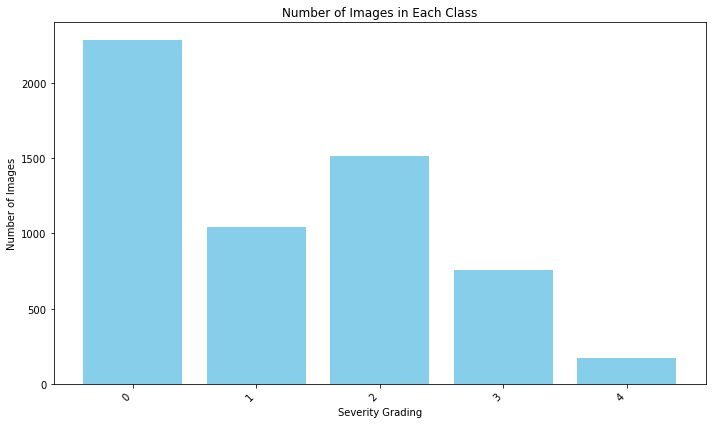

In [18]:
# Plotting bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Severity Grading')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
from imblearn.over_sampling import SMOTE
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np
import os

# Load train data
train_generator = ImageDataGenerator().flow_from_directory(
    "PreprocessedDataset/train",
    class_mode="categorical",
    shuffle=False,
    batch_size=64,  # Reduced batch size
    target_size=(224, 224),
    seed=42
)

# Concatenate data
x = []
y = []
for _ in range(train_generator.__len__()):
    batch_x, batch_y = train_generator.next()
    x.append(batch_x)
    y.append(batch_y)
x = np.concatenate(x)
y = np.concatenate(y)

# Reshape data
X_train = x.reshape(x.shape[0], -1)

# Apply SMOTE
sm = SMOTE(random_state=2)  # Reduced SMOTE batch size
X_smote, y_smote = sm.fit_resample(X_train, y)

# Save images incrementally
train_sep_dir = 'smotefolder'
if not os.path.exists(train_sep_dir):
    os.mkdir(train_sep_dir)

def save_images(X_smote, y_smote, train_sep_dir, start_index=0):
    for i in range(len(X_smote)):
        label = np.argmax(y_smote[i])  # Get index of maximum value (class label)
        label_dir = os.path.join(train_sep_dir, str(label))
        if not os.path.exists(label_dir):
            os.mkdir(label_dir)
        img = array_to_img(X_smote[i].reshape((224, 224, 3)))
        img.save(os.path.join(label_dir, f'smote_{start_index + i}.jpg'))

# Split saving into smaller batches
batch_size = 1000
for i in range(0, len(X_smote), batch_size):
    save_images(X_smote[i:i+batch_size], y_smote[i:i+batch_size], train_sep_dir, start_index=i)


Found 5778 images belonging to 5 classes.


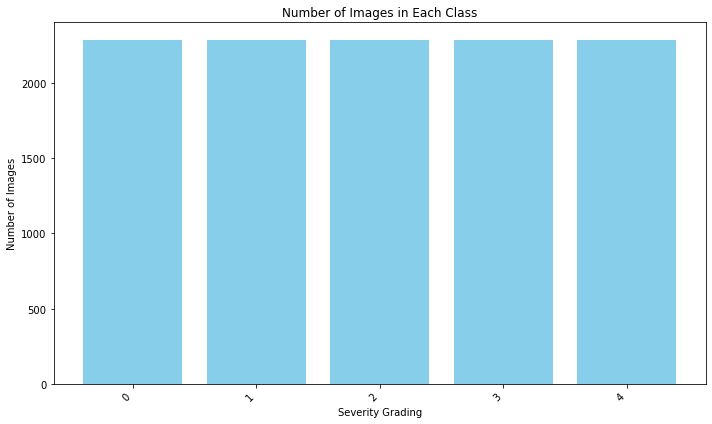

In [20]:
import os
import matplotlib.pyplot as plt
dataset_folder = "smotefolder"

# Function to count images in each class
def count_images_per_class(dataset_folder):
    class_counts = {}
    for class_name in os.listdir(dataset_folder):
        class_path = os.path.join(dataset_folder, class_name)
        if os.path.isdir(class_path):
            num_images = len([name for name in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, name))])
            class_counts[class_name] = num_images
    return class_counts

# Printing number of images in each class
class_counts = count_images_per_class(dataset_folder)
# Plotting bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Severity Grading')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight

# Define function to load image data from directory
def load_image_data(directory, image_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    generator = datagen.flow_from_directory(
        directory,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='sparse'  # For multi-class classification
    )

    return generator

# Load image data
train_generator = load_image_data('smotefolder')
val_generator = load_image_data('./PreprocessedDataset/val')

class_labels = np.unique(train_generator.classes)


# Define ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features
x = base_model.output

# Global average pooling layer
x = layers.GlobalAveragePooling2D()(x)

# Classifier
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(5, activation='softmax')(x)  # Assuming 5 classes

# Create model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile model with class weights
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=val_generator,
    validation_steps=len(val_generator),
)

# Save the trained model
model.save('resnet50_knee_osteoarthritis_model.h5')


Found 11430 images belonging to 5 classes.
Found 826 images belonging to 5 classes.
Epoch 1/30
358/358 [==============================] - 156s 418ms/step - loss: 1.1783 - accuracy: 0.4829 - val_loss: 2.8628 - val_accuracy: 0.3971
Epoch 2/30
358/358 [==============================] - 141s 394ms/step - loss: 0.9857 - accuracy: 0.5527 - val_loss: 1.3768 - val_accuracy: 0.4044
Epoch 3/30
358/358 [==============================] - 141s 394ms/step - loss: 0.9224 - accuracy: 0.5804 - val_loss: 1.1481 - val_accuracy: 0.5073
Epoch 4/30
358/358 [==============================] - 143s 399ms/step - loss: 0.8936 - accuracy: 0.5947 - val_loss: 1.2184 - val_accuracy: 0.4867
Epoch 5/30
358/358 [==============================] - 145s 403ms/step - loss: 0.8732 - accuracy: 0.6108 - val_loss: 1.1814 - val_accuracy: 0.4964
Epoch 6/30
358/358 [==============================] - 146s 406ms/step - loss: 0.8552 - accuracy: 0.6154 - val_loss: 1.9316 - val_accuracy: 0.2821
Epoch 7/30
358/358 [====================